In [4]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_random_walk(n, p, num_simulations):
    """
    Perform a Monte Carlo simulation of a biased random walk.
    
    Parameters:
        n : int
            Number of steps in each random walk.
        p : float
            Probability to step left (between 0 and 1).
        num_simulations : int
            Number of random walks to simulate.

    Returns:
        final_positions : ndarray
            Final positions after all simulations.
    """
    # Initialize an array to hold the final positions
    final_positions = np.zeros(num_simulations)

    for i in range(num_simulations):
        # Simulate one random walk
        steps = np.random.choice([-1, 1], size=n, p=[p, 1 - p])
        final_positions[i] = np.sum(steps)  # Final position is the sum of steps

    return final_positions

def rescale_and_center(data, lower_limit, upper_limit, center_value):
    """Rescale the data to the specified limits and center it around a given value."""
    # Calculate current min and max
    current_min = np.min(data)
    current_max = np.max(data)
    
    # Rescale data to [0, 1]
    scaled_data = (data - current_min) / (current_max - current_min)
    
    # Scale to the desired range [lower_limit, upper_limit]
    rescaled_data = lower_limit + (upper_limit - lower_limit) * scaled_data
    
    # Center around the specified value
    centered_data = rescaled_data - np.mean(rescaled_data) + center_value
    
    return centered_data

In [8]:
# Parameters
n = 2000              # Number of steps in each walk
p = 0.75              # Probability of stepping left
num_simulations = 10000  # Number of simulations

In [9]:
# Run Monte Carlo simulation
final_positions = monte_carlo_random_walk(n, p, num_simulations)

# Rescale and center final positions
lower_limit = -5  # Desired lower limit
upper_limit = 5   # Desired upper limit
center_value = 0  # Desired center value
final_positions_scaled = rescale_and_center(final_positions, lower_limit, upper_limit, center_value)

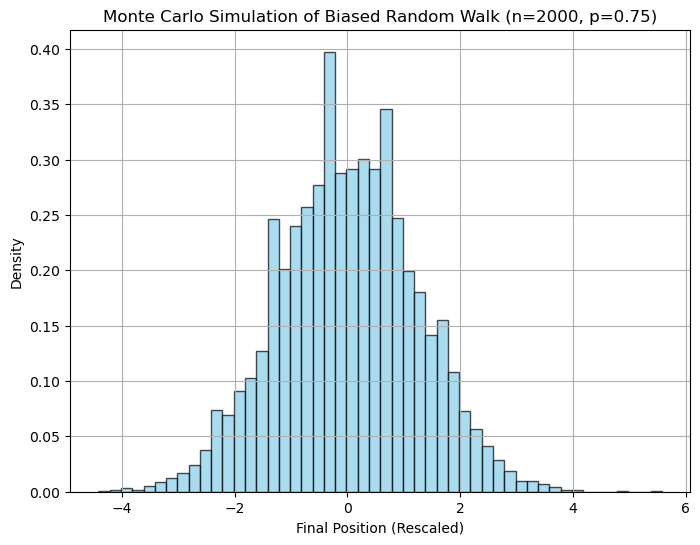

In [10]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.hist(final_positions_scaled, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Monte Carlo Simulation of Biased Random Walk (n={n}, p={p})')
plt.xlabel('Final Position (Rescaled)')
plt.ylabel('Density')
plt.grid(True)
plt.show()